# SD204_lab1
## WANG Yuqing

In [1]:
%matplotlib notebook
import pandas as pd
from os import path
import urllib
import zipfile
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Change here using YOUR own first and last names
fn1 = "Yuqing"
ln1 = "WANG"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD204_lab1", ln1, fn1])) + ".ipynb"

In [3]:
# download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)
        
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()

# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']

df = pd.read_csv(filename + '.txt', sep = ';', nrows=200000, na_values = na_values, usecols = fields)

# Exercise 1
## Question 1

In [4]:
df1 = df.dropna()
row_nan = df.count() - df1.count()
print "There are " + str(row_nan['Date']) + " row where Global_active_power or Sub_metering_1 are missing"

There are 3732 row where Global_active_power or Sub_metering_1 are missing


## Question 2

In [5]:
df1['Sub_metering_1'] = df1['Sub_metering_1'] * 60.0 / 1000.0

## Question 3

In [6]:
new_index = pd.to_datetime(df1.Date + df1.Time,format='%d/%m/%Y%H:%M:%S')
df1.set_index(new_index, inplace=True)
del df1['Date']
del df1['Time']
df1.head()

,Global_active_power,Sub_metering_1
2006-12-16 17:24:00,4.216,0.0
2006-12-16 17:25:00,5.360,0.0
2006-12-16 17:26:00,5.374,0.0
2006-12-16 17:27:00,5.388,0.0
2006-12-16 17:28:00,3.666,0.0


## Question 4

<IPython.core.display.Javascript object>


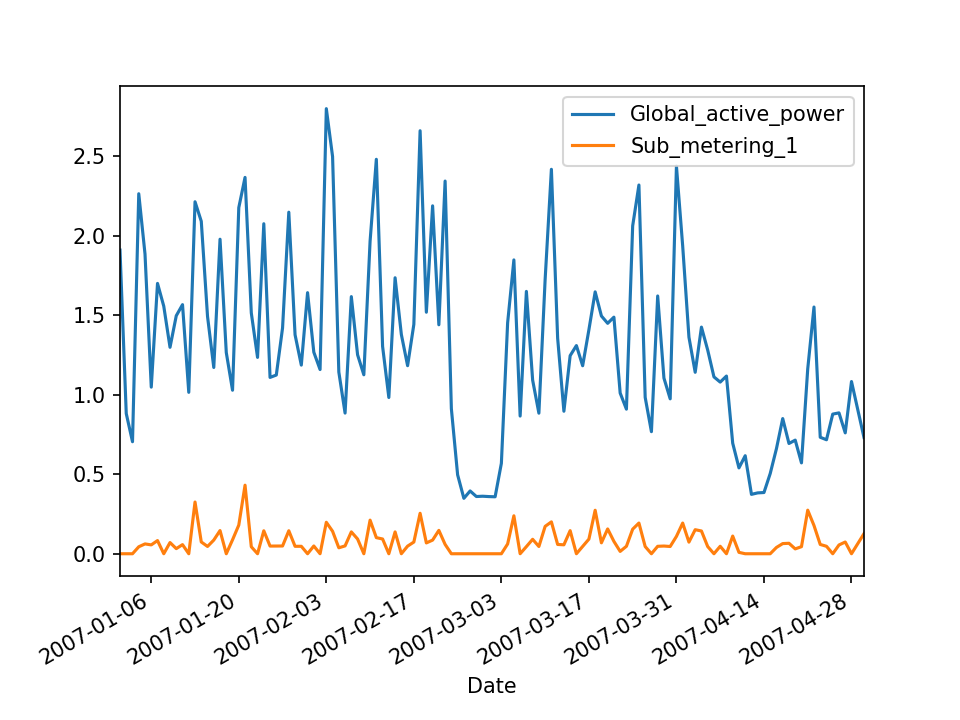

In [7]:
df2 = df.dropna()
df2['Sub_metering_1'] = df2['Sub_metering_1'] * 60.0 / 1000.0
df2.Date = pd.to_datetime(df2.Date , format = '%d/%m/%Y')
df2.truncate('2007-01-01', '2007-04-30')
df2 = df2.groupby(df2['Date']).mean()
df3 = df2.truncate('2007-01-01', '2007-04-30')
df3.plot()

Explanation: Maybe it's the data of the electric power conumption of a school. There was vacation during February 23 to March 3  and April 10 to April 15, the school was closed and didn't use much electric power. 

## Question 5

In [8]:
df1['weekday'] = df1.index.weekday

<IPython.core.display.Javascript object>


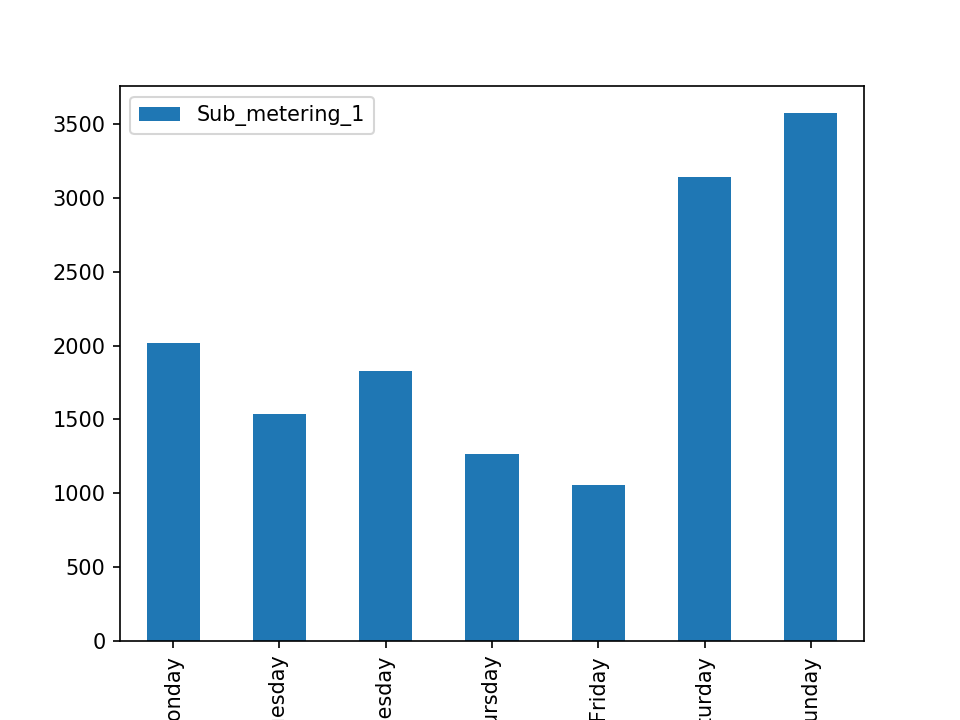

In [9]:
weekday_counts = df1.groupby('weekday').aggregate(sum)
del weekday_counts['Global_active_power']
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind = 'bar')

## Question 6

In [10]:
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'TG_STAID011249.txt'
Location = url + filename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('filename')):
        urllib.request.urlretrieve(Location, filename)
else:
    if not(path.isfile('filename')):
        urllib.urlretrieve(Location, filename)
        
# Detect and count lines with missing values.
na_values = [-9999]
fields = ['    DATE', '   TG']

tem = pd.read_csv(filename, sep=',' ,na_values=na_values, usecols=fields, comment='#')

In [11]:
tem['   TG'] = tem['   TG'] / 10.0
tem.head()

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5


## Question 7

<IPython.core.display.Javascript object>


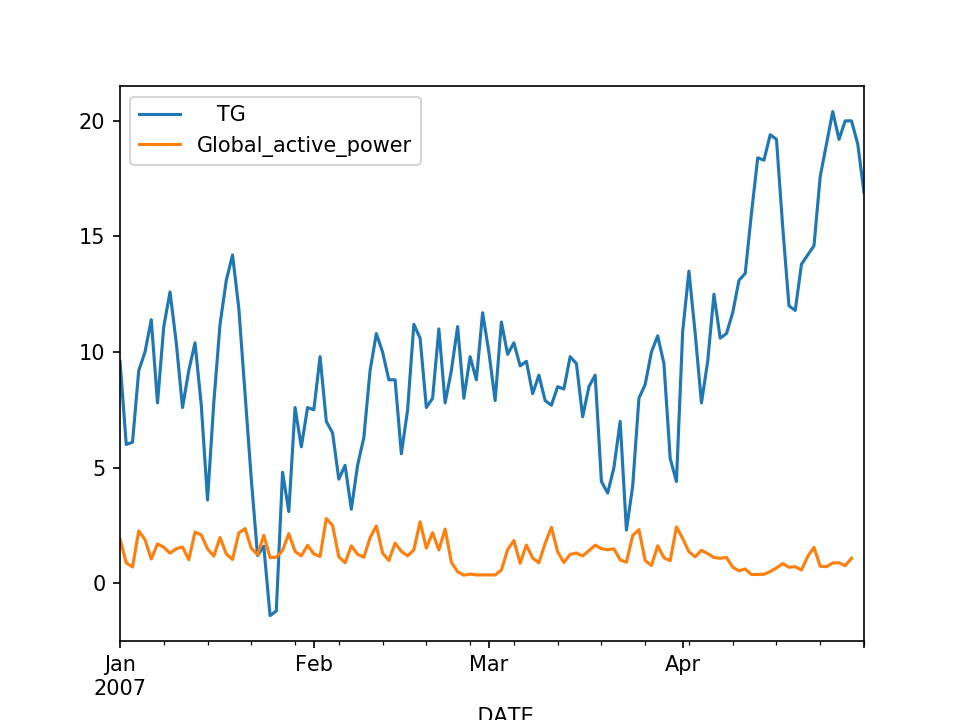

In [12]:
new_index = pd.to_datetime(tem['    DATE'],format = '%Y%m%d')
tem.set_index(new_index, inplace = True)
del tem['    DATE']
tem = tem.truncate('2007-01-01' , '2007-04-30')
tem['Global_active_power'] = df3['Global_active_power']
tem.plot()

# Exercise 2
## Question 8

In [13]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
  
# Detect and count lines with missing values.
fields = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
          'model year','origin','cars name']

car = pd.read_csv(url, sep = r"\s+", header = None, names=fields)
car = car.dropna()
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cars name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Question 9

In [14]:
car['origin'] = car['origin'].replace(1, 'USA' )
car['origin'] = car['origin'].replace(2, 'Europe' )
car['origin'] = car['origin'].replace(3, 'Japan' )
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cars name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


## Question 10

In [15]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import numpy as np
#data
car1 = car.loc[:8]
X = car1[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
X = sm.add_constant(X)
y = car1['mpg']
results = sm.OLS(y,X).fit().params
print results

cylinders       0.049592
displacement    0.054088
horsepower     -0.094531
weight         -0.004241
acceleration   -0.199367
model year      0.433928
dtype: float64


<IPython.core.display.Javascript object>


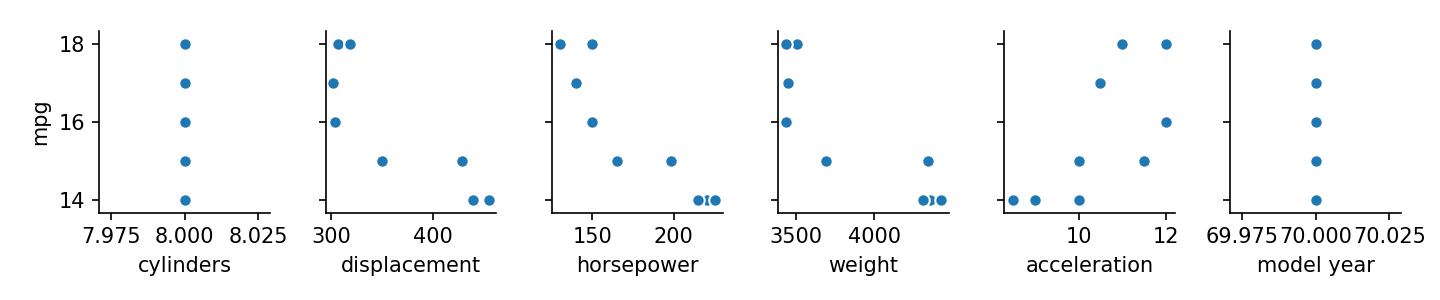

In [16]:
#plot
sns.pairplot(car1,x_vars = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'],
             y_vars = ['mpg'],size = 2, aspect = 0.8)
plt.show()

 ## Question 11

In [17]:
#data
X1 = car[['cylinders','displacement','horsepower','weight','acceleration', 'model year']]
X1['cylinders']    = (X1['cylinders']    - X1['cylinders'].mean())    / X1['cylinders'].var()
X1['displacement'] = (X1['displacement'] - X1['displacement'].mean()) / X1['displacement'].var()
X1['horsepower']   = (X1['horsepower']   - X1['horsepower'].mean())   / X1['horsepower'].var()
X1['weight']       = (X1['weight']       - X1['weight'].mean())       / X1['weight'].var()
X1['acceleration'] = (X1['acceleration'] - X1['acceleration'].mean()) / X1['acceleration'].var()
X1['model year']   = (X1['model year']   - X1['model year'].mean())   / X1['model year'].var()
y1 = car['mpg']
results1 = sm.OLS(y1,X1).fit().params
print results1

cylinders         -0.959790
displacement      84.081633
horsepower        -0.579820
weight         -4902.212928
acceleration       0.649043
model year        10.223129
dtype: float64


<IPython.core.display.Javascript object>


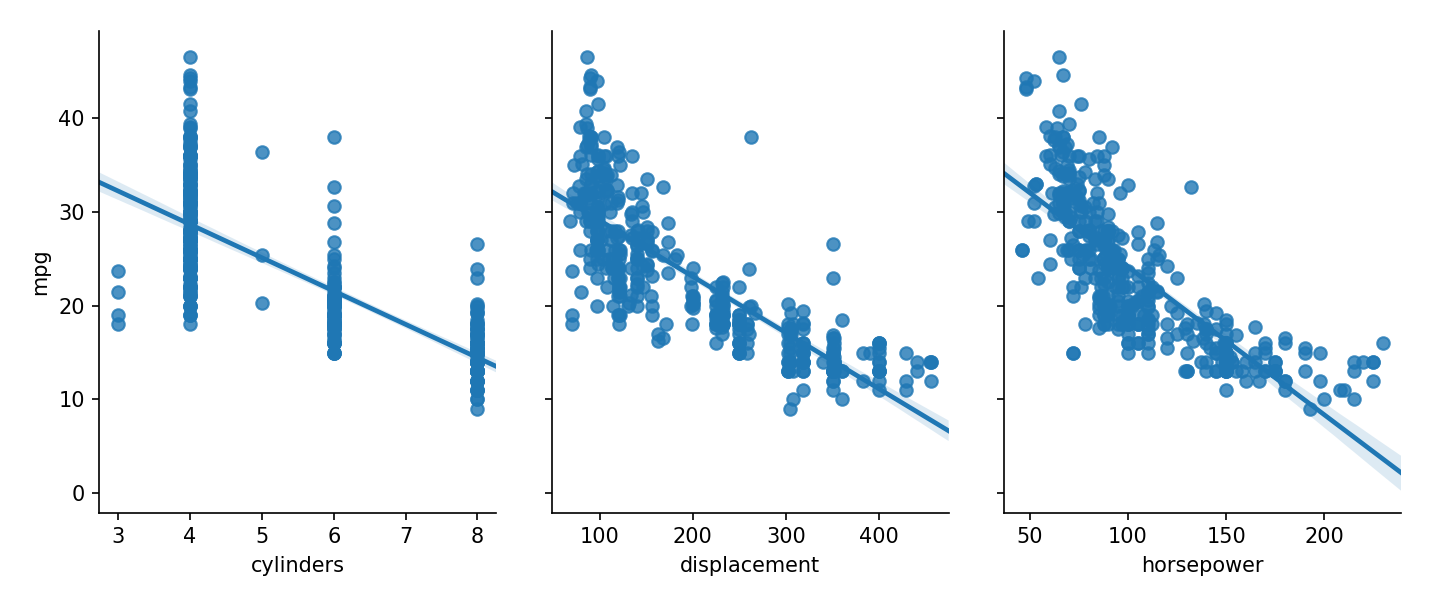

<IPython.core.display.Javascript object>


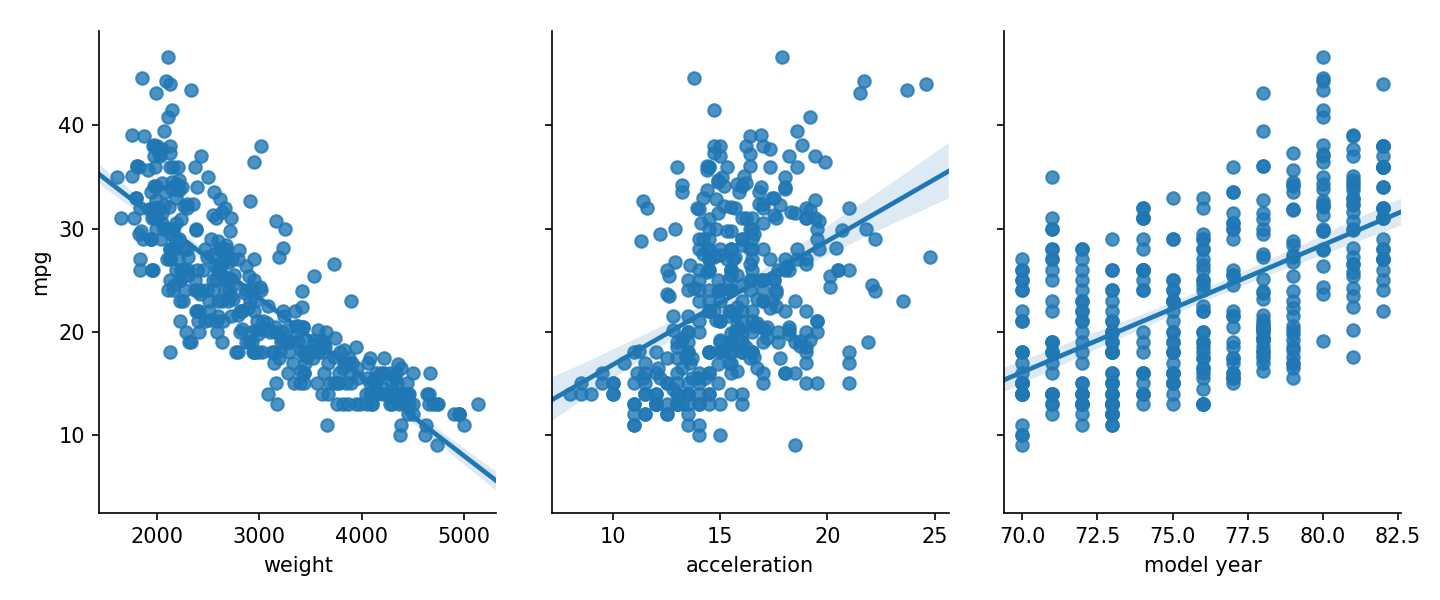

In [18]:
#plot
sns.pairplot(car,x_vars = ['cylinders', 'displacement', 'horsepower'], y_vars = ['mpg'],size = 4, aspect = 0.8, kind = 'reg')
sns.pairplot(car,x_vars = ['weight','acceleration','model year'], y_vars = ['mpg'], size = 4, aspect = 0.8, kind = 'reg')
plt.show()

According to my model, weight seem to best explain gasoline consumption 

## Question 12
$\Vert y - \bar y_{n} 1_{n} \Vert^{2} = (n-1)\times var(y)$<br>
So, $\Vert r \Vert^{2}=(n-1)\times (var(y)-var(\widehat y))$

In [19]:
X = car[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',  'model year']]
X = sm.add_constant(X)
y = car['mpg']
results = sm.OLS(y,X).fit()

y_hat = results.predict(X)
r_square = (car.count()['mpg'] - 1) * (y.var() - y_hat.var())
print r_square
np.isclose(r_square,np.linalg.norm(y-y_hat) ** 2)

4543.34702471


True

## Question 13

In [20]:
features = np.array([1, 6, 225, 100, 3233, 15.4, 117])
predict = results.predict(features)
print predict

[ 52.66427455]


I predict its consumption is 52.6